## 1. Write a function that can return each of the first three spherical Bessel functions $j_{n}(x)$:


$j_{0}(x) = \frac{sin x}{x}$ 

$j_{1}(x) = \frac{sin x}{x^2} - \frac{cos x}{x}$

$j_{2}(x) = \left(\frac{3}{x^2}-1\right)\frac{sin x}{x} - \frac{3 cos x}{x^2}$


## Your function should take as arguments a NumPy array $x$ and the order $n$, and should return an array of the designated order $n$ spherical Bessel function. Take care to make sure that your functions behave properly at $x = 0$.

## Demonstrate the use of your function by writing a Python routine that plots the three Bessel functions for $0 ≤ x ≤ 20$. Your plot should look like the one below. Something to think about: You might note that $j_{1}(x)$ can be written in terms of $j_{0}(x)$, and that $j_{2}(x)$ can be written in terms of $j_{1}(x)$ and $j_{0}(x)$. Can you take advantage of this to write a more efficient function for the calculations of $j_{1}(x)$ and $j_{2}(x)$?

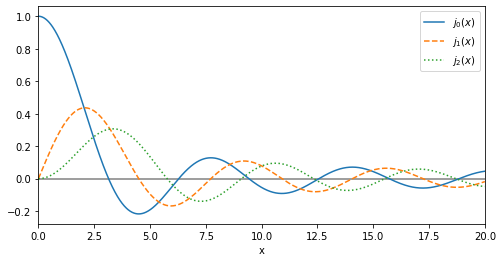

In [11]:
import numpy as np
import matplotlib.pyplot as plt

np.seterr(divide='ignore', invalid='ignore')

def bessel(x, n):
    if n == 0:
        z = np.where( x == 0, 1, np.sin(x)/x)
    if n == 1:
        z = np.where( x == 0, 0, np.sin(x)/(x**2) - np.cos(x)/x)
    if n == 2:
        z = np.where( x == 0, 0, ((3/x**2) - 1)*(np.sin(x)/x) - 3*np.cos(x)/x**2)        
    return z


x = np.linspace(0, 20, 1000)
y_0 = bessel(x, 0)
y_1 = bessel(x, 1)
y_2 = bessel(x, 2)

#plt.rc('mathtext', fontset='stix')

fig, ax = plt.subplots(figsize=(8,4))

ax.plot(x, y_0, label= '$j_{0}(x)$')
ax.plot(x, y_1, '--', label= '$j_{1}(x)$')
ax.plot(x, y_2, ':', label = '$j_{2}(x)$')


plt.legend(loc='upper right')
ax.set_xlim(0, 20)
ax.set_xlabel('x')
ax.axhline(color='gray', zorder=-1)

#There must be some other way to evaluate them



## 2.

## (a) Write a function that simulates the rolling of $n$ dice. Use the NumPy function $\textit{random.random_integers(6)}$, which generates a random integer between $1$ and $6$ with equal probability (like rolling fair dice). The input of your function should be the number of dice thrown each roll and the output should be the sum of the $n$ dice. See $§9.2$ for a description of NumPy’s module random, which has a number of useful functions for generating arrays of random numbers.

In [8]:
import numpy as np
import matplotlib.pyplot as plt

def sum(n, t):
    sum = 0
    for i in range(n):
        sum += np.random.randint(1, 6 + 1, t)       
    return sum


## (b) “Roll” $2$ dice $10,000$ times keeping track of all the sums of each set of rolls in a list. Then use your program to generate a histogram summarizing the rolls of two dice $10,000$ times. The result should look like the histogram plotted above. Use the matplotlib function $hist$ (see http://matplotlib.org/api/pyplot_summary.html) and set the number of bins in the histogram equal to the number of different possible outcomes of a roll of your dice. For example, the sum of two dice can be anything between $2$ and $12$, which corresponds to $11$ possible outcomes. You should get a histogram that looks like the one above.

Text(0.5, 0, 'sum of 2 dice')

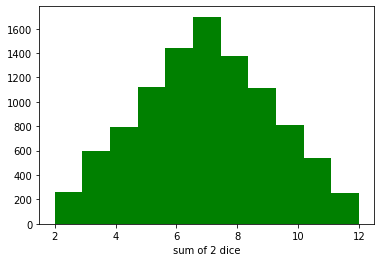

In [9]:
import numpy as np
import matplotlib.pyplot as plt

def sum(n, t):
    sum = 0
    for i in range(n):
        sum += np.random.randint(1, 6 + 1, t)       
    return sum

s = sum(2, 10000)

plt.hist(s, 11, facecolor='green')
plt.xlabel('sum of 2 dice')

## (c) Repeat part (b) using $3$ dice and plot the resulting histogram.

Text(0.5, 0, 'sum of 3 dice')

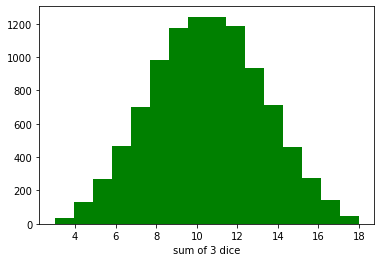

In [12]:
s3 = sum(3, 10000)

plt.hist(s3, 16, facecolor='green')
plt.xlabel('sum of 3 dice')

## (3) In $§7.5$, we showed that the best fit of a line $y = a + bx$ to a set of data ${(x_{i},y_{i})}$ is obtained for the values of $a$ and $b$ given by $Eq. (7.10)$. Those formulas were obtained by finding the values of $a$ and $b$ that minimized the sum in $Eq. (7.5)$. This approach and these formulas are valid when the uncertainties in the data are the same for all data points. The Python function $lineFit(x, y)$ in $§7.5.1$ implements $Eq. (7.10)$.

## (a)  Write a new fitting function $lineFitWt(x, y)$ that implements the formulas given in $Eq. (7.14))$ that minimize the $\chi^2$ function give by $Eq. (7.12)$. This more general approach is valid when the individual data points have different weightings or when they all have the same weighting. You should also write a function to calculate the reduced chi-squared $\chi_{r}^2$ defined by $Eq. (7.12)$.


In [71]:
import numpy as np
import matplotlib.pyplot as plt

def lineFit(x, y):
    '''We mus adjust the data into a linear functoin'''
    n = len(x)
    xavg = x.mean()
    slope = (y * (x - xavg)).sum()/(x * (x - xavg)).sum()
    yint = y.mean() - slope*xavg
    
    chi_c = ((y - yint - slope*x)**2).sum()
    chi_cr = chi_c/(n - 2)
    
    return slope, yint, chi_cr


def lineFitW(x, y, err):
    
    n = len(x)
    
    xbar = (x/(err**2)).sum()/(1/(err**2)).sum()
    ybar = (y/(err**2)).sum()/(1/(err**2)).sum()
    
    b = (((x - xbar)*y)/(err**2)).sum()/((((x - xbar)*x)/(err**2))).sum()
    a = ybar - b*xbar
    
    f = (((y - a - b*x)/(err))**2).sum()
    fn = f/(n-2)
    
    return a, b, fn


### (b) Write a Python program that reads in the data below, plots it, and fits it using the two fitting functions $lineFit(x, y)$ and $lineFitWt(x, y)$.Your program should plot the data with error bars and with both fits with and without weighting, that is from $lineFit(x, y)$ and $lineFitWt(x, y, dy)$. It should also report the results for both fits on the plot, similar to $Fig. 7.3$, as well as the values of $\chi_{r}^2$, the reduce chi-squared value, for both fits. Explain why weighting the data gives a steeper or less steep slope than the fit without weighting.

113.01159995957622


Text(0, 0.5, 'velocity(m/s)')

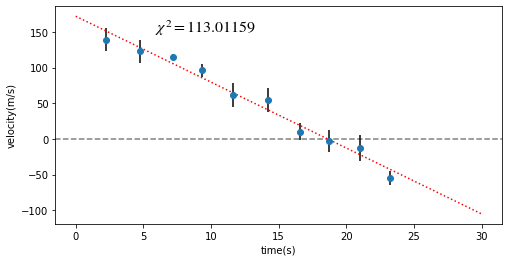

In [86]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('mathtext', fontset='stix')

time, velocity, err_y = np.loadtxt('dataexercise7.txt', skiprows=2, unpack=True)

a1, b1, chi = lineFit(time, velocity)

x = np.linspace(0, 30, 100)
y = a1*x + b1
print(chi)

fig, ax = plt.subplots(figsize=(8,4))

ax.errorbar(time, velocity, fmt='oC0', label='data', yerr=err_y, ecolor='black')
ax.axhline(color='gray', linestyle='--', zorder=-1)
ax.text(0.45, 0.95,
        r'$\chi^2 = 113.01159$',
        fontsize=16, ha='right', va='top',
        transform=ax.transAxes)

ax.plot(x, y, color='red' ,linestyle=':')

ax.set_xlabel('time(s)')
ax.set_ylabel('velocity(m/s)')

0.7255301700054674


Text(0, 0.5, 'velocity(m/s)')

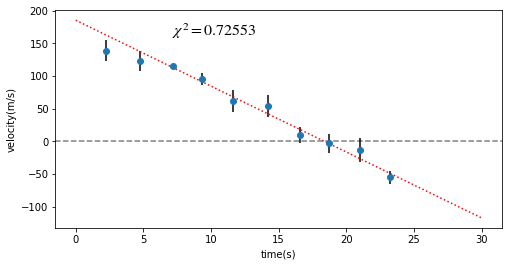

In [83]:
import numpy as np
import matplotlib.pyplot as plt

plt.rc('mathtext', fontset='stix')

time, velocity, err_y = np.loadtxt('dataexercise7.txt', skiprows=2, unpack=True)

a2, b2, err2 = lineFitW(time, velocity, err_y)

x = np.linspace(0, 30, 100)
y = b2*x + a2

print(err2)

fig, ax = plt.subplots(figsize=(8, 4))

ax.errorbar(time, velocity, fmt='oC0', label='data', yerr=err_y, ecolor='black')
ax.plot(x, y, color='red', linestyle=':')
ax.axhline(color='gray', linestyle='--', zorder=-1)
ax.text(0.45, 0.95,
        r'$\chi^2 = 0.72553$',
        fontsize=16, ha='right', va='top',
        transform=ax.transAxes)

ax.set_xlabel('time(s)')
ax.set_ylabel('velocity(m/s)')

### (4) Modify the function $lineFitWt(x, y)$ that you wrote in Exercise $4$ above so that in addition to returning the fitting parameters $a$ and $b$, it also returns the uncertainties in the fitting parameters $\sigma_{a}$ and $\sigma_{b}$ using the formulas given by $Eq. (7.16)$. Use your new fitting function to find the uncertainties in the fitted slope and $y$- intercept for the data provided with Exercise $4$.